# HOUSE PRICE PREDICTION 

In [1]:
''' 
PROJECT STEPS
1. LOOK AT THE BIG PICTURE
2. GET THE DATA
3. DISCOVER AND VISUALIZE THE DATA TO GAIN INSIGHTS
4. PREPARE THE DATA FOR MACHINE LEARNING ALGORITHMS
5. SELECT A MODEL AND TRAIN IT
6. FINE-TUNE YOUR MODEL
7. PRESENT YOUR SOLUTION
8. LAUNCH,MONITOR,AND MAINTAIN YOUR SYSTEM
'''

' \nPROJECT STEPS\n1. LOOK AT THE BIG PICTURE\n2. GET THE DATA\n3. DISCOVER AND VISUALIZE THE DATA TO GAIN INSIGHTS\n4. PREPARE THE DATA FOR MACHINE LEARNING ALGORITHMS\n5. SELECT A MODEL AND TRAIN IT\n6. FINE-TUNE YOUR MODEL\n7. PRESENT YOUR SOLUTION\n8. LAUNCH,MONITOR,AND MAINTAIN YOUR SYSTEM\n'

# IMPORT LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# LOAD DATASET

In [1]:
path="C:\\Users\\DELL\\Downloads\\Bengaluru_House_Data.csv.QUOTE_NONE"
df_raw=pd.read_csv(path)
df_raw.shape

NameError: name 'pd' is not defined

In [5]:
df_raw.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df_raw.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [8]:
df=df_raw.copy()  #to get the copy of the raw data


In [9]:
df.info()  #to get the information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [10]:
#we have only 3 numerical features--bath,balcony and price
# 6 categorical feature--area type,availability,size,society,total_srft
#target feature--price
#price in lakhs

In [11]:
df.describe() 
#observe 75% and max value it shows huge difference

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


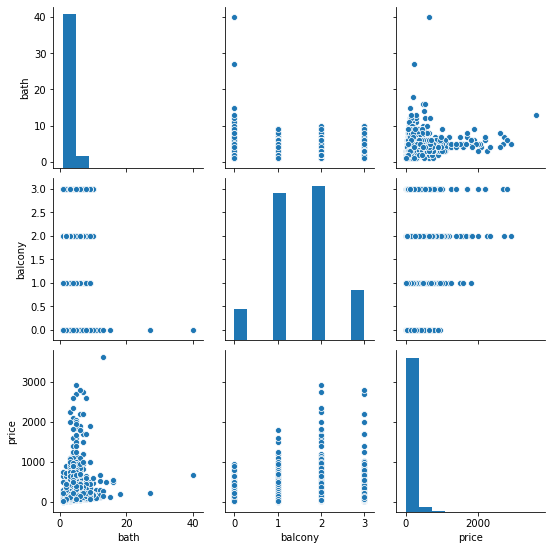

In [12]:
sns.pairplot(df)
#bath and price have slightly linear coorelation with some outliers

In [13]:
#value count of each feature
def value_count(df):
    for var in df.columns:
        print(df[var].value_counts())
        print("----------------------")

In [14]:
value_count(df)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
----------------------
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
15-Jun               1
17-Jan               1
16-Jul               1
16-Oct               1
Name: availability, Length: 81, dtype: int64
----------------------
Whitefield                                            540
Sarjapur  Road                                        399
Electronic City                                       302
Kanakpura Road                                        273
Thanisandra                                           234
                                                     ... 
AECS LAYOUT A-BLOCK Singasandra                         1
Banagirinagar                                           1
bsk 6th stage 2ad block near sri conversation 

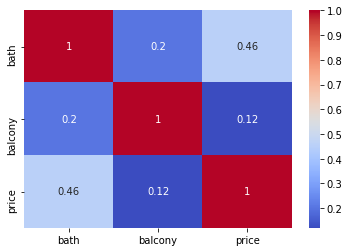

In [15]:
# correlation heatmap
num_vars=['bath','balcony','price']
sns.heatmap(df[num_vars].corr(),cmap='coolwarm',annot=True)
#correlation of bath is grater than a balcony with the price

# PREPARE DATA FOR THE MACHINE LEARNING MODEL

# DATA CLEANING

In [16]:
df.isnull().sum()  # find the how much missing data is available

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [17]:
df.isnull().mean()*100  # % of the missing value
#society has 41.3% missing value(need to drop)

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

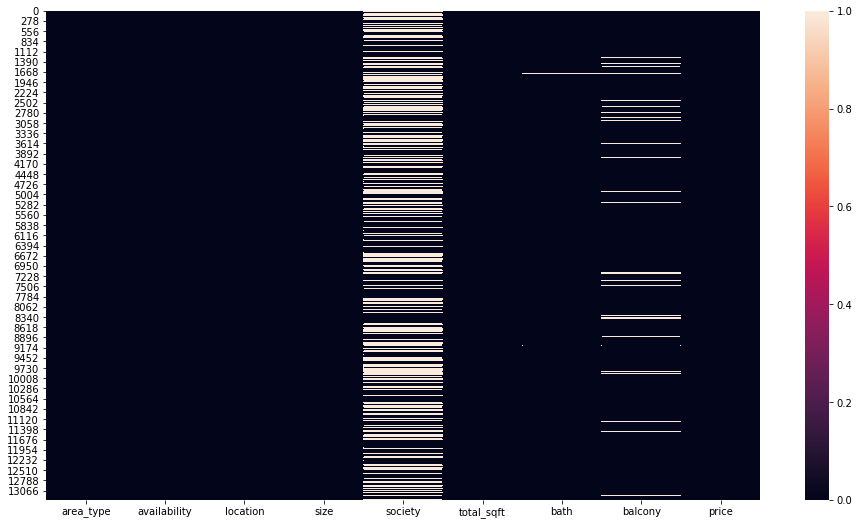

In [18]:
# visualize missing value using heatmap to get idea where is the missing value

plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

In [19]:
#drop ----> society feature
#because 41.3% missing value
df2=df.drop('society',axis='columns')
df2.shape

(13320, 8)

In [20]:
# fill mean value in the balcony feature
# because it contains 4.5% missing value
df2['balcony']=df2['balcony'].fillna(df2['balcony'].mean())
df2.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

In [21]:
# drop na value from df2
#because there is very less % value missing
df3=df2.dropna()
df3.shape

(13246, 8)

In [22]:
df3.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [23]:
df3.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


# FEATURE ENGINEERING

In [25]:
# to show all the columns and rows
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

# CONVERTING TOTAL_SQFT FEATURES IN NUMERIC

In [26]:
df3['total_sqft'].value_counts()

# here we observe that total_sqft contains string values in different formats
# float , int like value 1689.28,817
# range value:540-740
#number and strings--142.845sq.,meter,1175sq.,yards ,16 rounds
# best strategy is to convert it into number by spliting it

1200                 843
1100                 221
1500                 204
2400                 195
600                  180
1000                 172
1350                 132
1050                 123
1300                 117
1250                 114
900                  112
1400                 108
1800                 104
1150                 101
1600                 100
1140                  91
2000                  82
1450                  70
1650                  69
800                   67
3000                  66
1075                  66
1020                  63
2500                  62
1125                  60
1160                  60
1550                  60
950                   59
1180                  58
1700                  58
1260                  57
1255                  56
1080                  55
1220                  55
1070                  53
700                   52
750                   52
1175                  48
4000                  48
1225                  48


In [28]:
total_sqft_int=[]
for str_val in df3['total_sqft']:
    try:
        total_sqft_int.append(float(str_val))# if '123.4 like this value in str then convert it into float'
    except:
        try:
            temp=[]
            temp=str_val.split('-')
            total_sqft_int.append((float(temp[0])+float(temp[-1]))/2)# '123 -534' this str value split
        except:
            total_sqft_int.append(np.nan)# if value not contain in above format then consider it as nan

In [29]:
# reset the index of the dataframe
df4=df3.reset_index(drop=True) # drop=True --do not add index column in df

In [30]:
# join df4 and total_sqft_int in list
df5=df4.join(pd.DataFrame({'total_sqft_int':total_sqft_int}))
df5.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0


In [31]:
df5.tail()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int
13241,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.000000,231.0,3453.0
13242,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,1.584376,400.0,3600.0
13243,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.000000,60.0,1141.0
13244,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.000000,488.0,4689.0
13245,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,550,1.0,1.000000,17.0,550.0


In [32]:
df5.isnull().sum()

area_type          0
availability       0
location           0
size               0
total_sqft         0
bath               0
balcony            0
price              0
total_sqft_int    46
dtype: int64

In [33]:
# drop na value
df6=df5.dropna()
df6.shape

(13200, 9)

In [34]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13200 entries, 0 to 13245
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       13200 non-null  object 
 1   availability    13200 non-null  object 
 2   location        13200 non-null  object 
 3   size            13200 non-null  object 
 4   total_sqft      13200 non-null  object 
 5   bath            13200 non-null  float64
 6   balcony         13200 non-null  float64
 7   price           13200 non-null  float64
 8   total_sqft_int  13200 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.0+ MB


# WORKING ON THE SIZE FEATURE

In [35]:
df6['size'].value_counts()
3 size feature shows the number of rooms

2 BHK         5192
3 BHK         4277
4 Bedroom      816
4 BHK          574
3 Bedroom      541
1 BHK          527
2 Bedroom      325
5 Bedroom      293
6 Bedroom      190
1 Bedroom      100
8 Bedroom       83
7 Bedroom       83
5 BHK           56
9 Bedroom       45
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            7
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
43 Bedroom       1
13 BHK           1
18 Bedroom       1
16 BHK           1
14 BHK           1
19 BHK           1
12 Bedroom       1
27 BHK           1
Name: size, dtype: int64

In [36]:
# in size feature we assume that 
# 2 BHK= 2 bedroom == 2 bk
# so take only number and remove suffix text

size_int=[]
for str_val in df6['size']:
    temp=[]
    temp=str_val.split(" ")
    try:
        size_int.append(int(temp[0]))
    except:
        size_int.append(np.nan)
        print("Noice=",str_val)

In [37]:
df6=df6.reset_index(drop=True)

In [38]:
# join df6 and list size_int
df7=df6.join(pd.DataFrame({'bhk':size_int}))
df7.shape

(13200, 10)

In [39]:
df7.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0,2


In [40]:
df7.tail()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk
13195,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.000000,231.0,3453.0,5
13196,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,1.584376,400.0,3600.0,4
13197,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.000000,60.0,1141.0,2
13198,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.000000,488.0,4689.0,4
13199,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,550,1.0,1.000000,17.0,550.0,1


# FINDING OUTLIER AND REMOVING

In [41]:
# function to create histogram ,Q-Q plot and boxplot 

# for Q-Q plots
import scipy.stats as stats
def diagnostic_plots(df,variable):
    #function takes a dataframe(df) and the variable of interest as arguments
    
    # define figure size
    plt.figure(figsize=(16,4))
    
    # histogram
    plt.subplot(1,3,1)
    sns.distplot(df[variable],bins=30)
    plt.title('Histogram')
    
    #Q-Q  PLOT
    plt.subplot(1,3,2)
    stats.probplot(df[variable],dist='norm',plot=plt)
    plt.ylabel('Variable quantities')
    
    # boxplot
    plt.subplot(1,3,3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    
    plt.show()

***********bath********


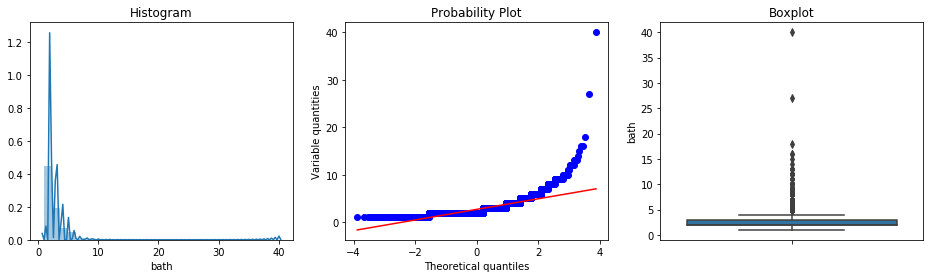

***********balcony********


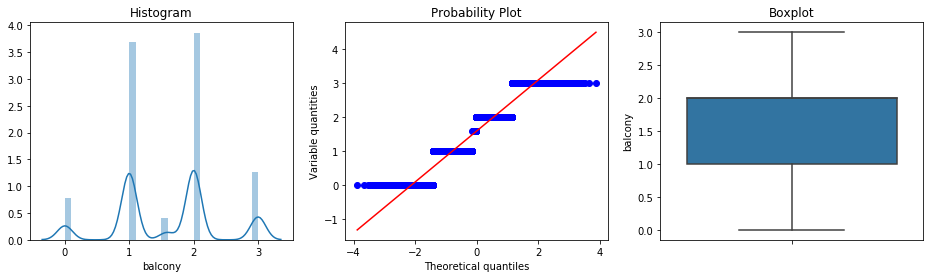

***********total_sqft_int********


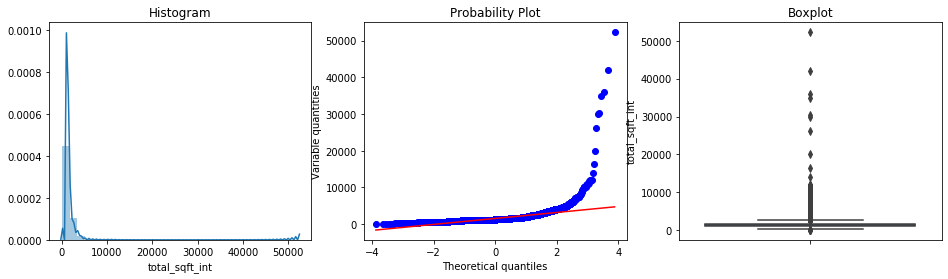

***********bhk********


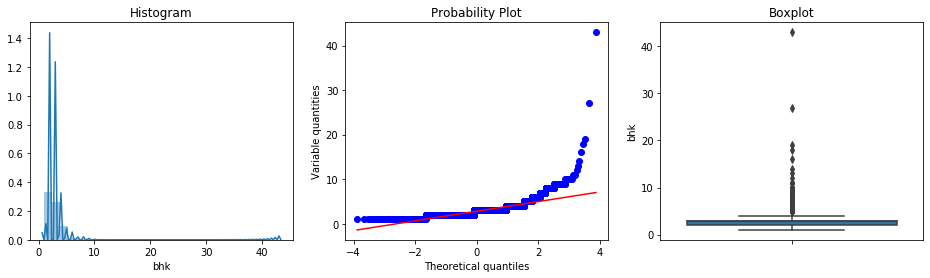

***********price********


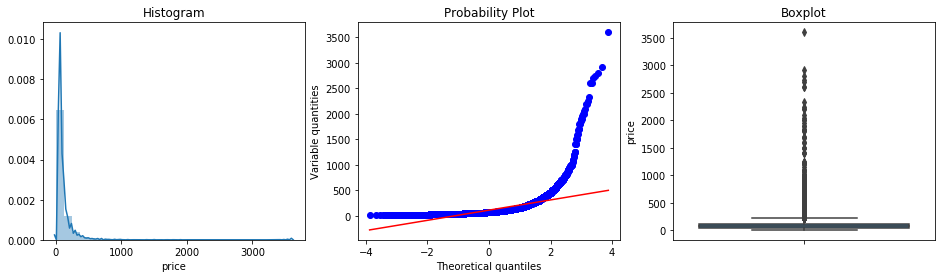

In [42]:
num_var=['bath','balcony','total_sqft_int','bhk','price']
for var in num_var:
    print("***********{}********".format(var))
    diagnostic_plots(df7,var)
    
    # here we observe outlier using histogram,qq plot and boxplot

In [43]:
# here we consider 1 BHK required min. 350 sqft area
df7[df7['total_sqft_int']/df7['bhk']<350].head()

# now we found outliers

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,1020,6.0,1.584376,370.0,1020.0,6
26,Super built-up Area,Ready To Move,Electronic City,2 BHK,660,1.0,1.000000,23.1,660.0,2
29,Super built-up Area,Ready To Move,Electronic City,3 BHK,1025,2.0,1.000000,47.0,1025.0,3
45,Plot Area,Ready To Move,HSR Layout,8 Bedroom,600,9.0,1.584376,200.0,600.0,8
57,Plot Area,Ready To Move,Murugeshpalya,6 Bedroom,1407,4.0,1.000000,150.0,1407.0,6


In [44]:
# if 1 BHK total_sqft area < 350 then we are going to remove them
df8=df7[~(df7['total_sqft_int']/df7['bhk']<350)]
df8.shape

(12106, 10)

In [45]:
# create new feature that is price per square foot
# it helps to find the outliers

# price in lakhs so convert into ruppee and then / by total_sqft_int
df8['price_per_sqft']=df8['price']*100000/df8['total_sqft_int']
df8.head()

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0,2,4250.000000


In [46]:
df8.price_per_sqft.describe()

# where we can see huge difference between min and max price_per_sqft
# min 6308.502826  max 17470.588235


count     12106.000000
mean       6184.466889
std        4019.983503
min         267.829813
25%        4200.030048
50%        5261.108523
75%        6800.000000
max      176470.588235
Name: price_per_sqft, dtype: float64

In [51]:
# removing outliers using help of "price per sqrt" taking std and mean per location
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out


df9=remove_pps_outliers(df8)
df9.shape

(8888, 11)

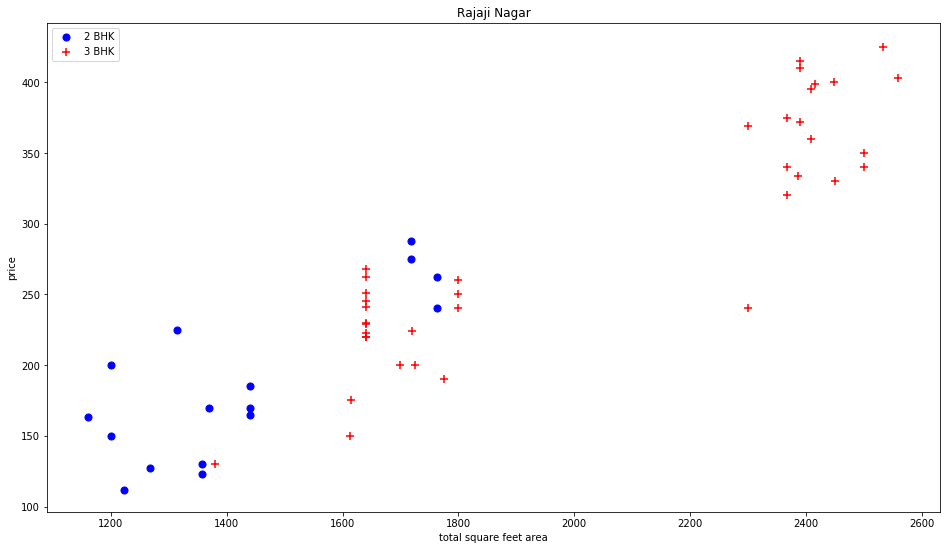

In [55]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location)& (df.bhk==2)]
    bhk3=df[(df.location==location)&(df.bhk==3)]
    plt.figure(figsize=(16,9))
    plt.scatter(bhk2.total_sqft_int,bhk2.price,color='Blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft_int,bhk3.price,color='Red',label='3 BHK',s=50,marker="+")
    plt.xlabel("total square feet area")
    plt.ylabel('price')
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df9,"Rajaji Nagar")

# in below scatterplot we observe that at same location price of
# 2 BHK house is grater than the 3 BHK so it is outlier
    

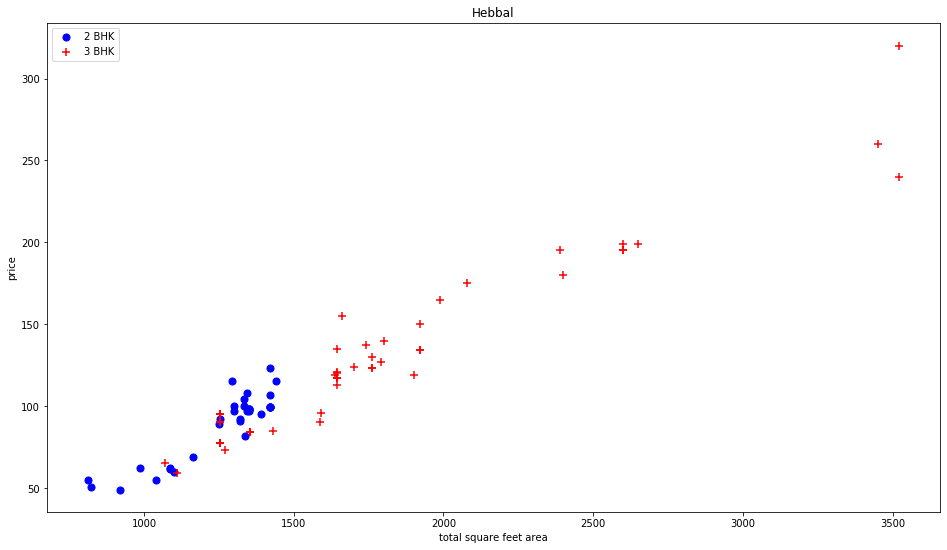

In [56]:
plot_scatter_chart(df9,"Hebbal")
# in below scatterplot we observe that at same location price of 
# 3 BHK house is less than 2 BHK so it is outlier